# 기술 통계

In [2]:
import pandas as pd

In [3]:
car = pd.read_excel('data/car.xlsx')
car.head()

,mileage,model,price,year,my_car_damage,other_car_damage
0,63608,K3,970,2017,0,564596
1,69336,K3,1130,2015,1839700,1140150
2,36000,K3,1380,2016,446520,2244910
3,19029,K3,1390,2017,889000,4196110
4,97090,K3,760,2015,2339137,2029570


## 중심 경향치: 평균, 중앙값, 최빈값

In [16]:
# 평균 .mean()
car.mileage.mean()

77483.22262773722

In [17]:
# 중앙값 .median()
car.mileage.median()

71649.0

In [18]:
# 최빈값 .mode()
car.model.mode()

0    Avante
dtype: object

In [15]:
# 그룹별 최빈값 .value_counts()
car.model.value_counts()

(0    Avante
 dtype: object,
 Avante    205
 K3         69
 Name: model, dtype: int64)

## 분위수: 사분위, 백분위, 최대값, 최소값

In [34]:
# 최대값 .max()
car.mileage.max()

310000

In [36]:
# 최소값 .min()
car.mileage.min()

2287

In [37]:
# 분위수 .quantile()
# 1사분위수, 3사분위수
car.mileage.quantile(.25), car.mileage.quantile(.75)

(47597.5, 103193.75)

## 변산성 측정치: 범위(+사분위간 범위)

In [41]:
# 범위
mil_range = car.mileage.max() - car.mileage.min()
mil_range

307713

In [43]:
# 사분위간 범위 IQR
mil_iqr = car.mileage.quantile(.75) - car.mileage.quantile(.25)
mil_iqr

55596.25

# 표집 분포

In [82]:
import numpy as np
import matplotlib.pyplot as plt

In [83]:
# np.random.randint(min, max, size=개수)
n = np.random.randint(1, 7, size=10)
n, n.mean()

(array([3, 6, 3, 5, 6, 5, 5, 6, 1, 3]), 4.3)

(array([1., 0., 0., 0., 3., 0., 0., 0., 3., 3.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

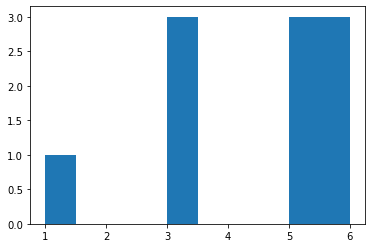

In [84]:
# 히스토그램: 데이터를 일정 구간마다 잘라서 빈도를 그림
# plt.hist() = (y축 array, x축 array)
# y축 = 빈도(개수)
# x축 = 데이터의 범위
plt.hist(n)  

# plt.xlim(a, b) x 축 범위 a~b 지정

(array([ 1.,  2.,  7., 12., 18., 21., 14., 17.,  5.,  3.]),
 array([1.9 , 2.19, 2.48, 2.77, 3.06, 3.35, 3.64, 3.93, 4.22, 4.51, 4.8 ]),
 <BarContainer object of 10 artists>)

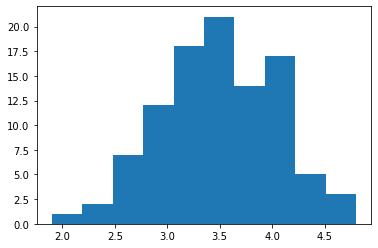

In [92]:
# 주사위를 10번 던졌을 때의 평균을 구하고
# 그 평균을 100번 냈을 때의 분포도
ms = []
for _ in range(100):
    n = np.random.randint(1, 7, size=10) # size가 표본의 크기
    m = n.mean() # 표본 평균
    ms.append(m)

plt.hist(ms) # 표집 분포

# t분포를 이용한 평균의 신뢰구간

In [95]:
pip install pingouin

     |████████████████████████████████| 205 kB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 827 kB 16.3 MB/s eta 0:00:01
  Created wheel for pingouin: filename=pingouin-0.3.12-py3-none-any.whl size=204286 sha256=7edb99ec8d0c3351124388e67e59af2a3bd51de3b0fb2f187fcb1d67b9c4b5f4
  Stored in directory: /Users/goyo/Library/Caches/pip/wheels/56/74/f2/a766175283c1c2479db49da5e259a7ffa418ed584d43f5c058
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=b72902103fcfb753c1415dd9139daa7bcd4f8c577a21466ea3088945d16dae67
  Stored in directory: /Users/goyo/Library/Caches/pip/wheels/6a/33/c4/0ef84d7f5568c2823e3d63a6e08988852fb9e4bc822034870a
Successfully built pingouin littleutils
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pingouin as pg

In [6]:
car.mileage.mean()

77483.22262773722

In [5]:
pg.ttest(car.mileage, 0, confidence=0.95)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,29.816386,273,two-sided,7.513310e-88,"[72367.22, 82599.22]",1.801274,1.384e+84,1.0


In [8]:
car.price.mean()

853.6605839416059

In [9]:
pg.ttest(car.price, 0, confidence=0.95)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,42.483582,273,two-sided,2.486212e-122,"[814.1, 893.22]",2.566527,2.773e+118,1.0


### 부트스트래핑

In [18]:
import numpy as np
import matplotlib as plt

In [19]:
data = car.price
data.mean()

853.6605839416059

In [20]:
x = np.random.choice(data, size=len(data))

In [21]:
ms = []
for _ in range(10000):
    x = np.random.choice(data, size=len(data))
    m = x.mean()
    ms.append(m)
    
plt.hist(ms)

AttributeError: module 'matplotlib' has no attribute 'hist'

In [ ]:
np.quantile(ms, [.025, .975])

# 연습문제

In [39]:
sf = pd.read_excel('data/safety.xlsx')
sf.head()

,risk,fuel,aspiration,doors,body,wheels,engine_location,wheel_base,length,width,height,curb_weight,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg
0,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,3.19,3.4,10.0,102,5500,24,30
1,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,3.19,3.4,8.0,115,5500,18,22
2,1,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,3.19,3.4,8.5,110,5500,19,25
3,1,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,3.13,3.4,8.3,140,5500,17,20
4,2,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,3.50,2.8,8.8,101,5800,23,29


In [48]:
sf.width.mean()

65.60754716981134

In [49]:
sf.width.median()

65.4

In [50]:
sf.body.mode()

0    sedan
dtype: object

In [44]:
width_range = sf.width.max() - sf.width.min()
width_range

11.400000000000006

In [46]:
width_iqr = sf.width.quantile(.75) - sf.width.quantile(.25)
width_iqr

2.5

In [52]:
sf.width.var()

3.7942464771913063

In [53]:
sf.width.std()

1.9478825624742644